In [1]:
import pandas as pd
df=pd.read_csv("housing_ca.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


longitude,latitude:Kinh độ,vĩ độ .có thể dùng map để hiển thị 
housing_median_age: Tuổi trung vị của các ngôi nhà tỏng 1 block.Số này càng nhỏ các ngôi nhà càng mới
total_rooms: Tổng số phòng trong 1 block
total_bedrooms: Tổng số phòng ngủ trong 1 block
population: Tổng dân số trong 1 block
households: số hộ gia đình tỏng 1 block
Median_income:Thu nhập trung vị của các hộ gia đình trong 1 khối(đơn vị là 10 nghìn USD)
median_house_value: giá nhà trung vị trong 1 block
Sơ bộ khả năng :Đều là các trường thông tin nhiều ý nghĩa ,có gia giá trị cao
+có thể xây dựng mô hình dự đoán giá nhà (KNN)
+Có thể xây dựng mô hình dự đoán thu nhập trung vị (KNN)
+Có thể xây dựng mô hình dự đoán tuổi trung vị của các ngôi nhà (KNN)
+Phân nhóm các hộ gia đình theo 1 hoặc nhiều tiêu chí gì đó (K-Means)
+Phân tích mật độ dân cư,so sánh với thu nhập,trực quan hóa trên bản đồ,...(phân tích chuyên sâu)







In [2]:
#Một vài thống kê 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
#Kiểm tra có trường hợp lặp hàng hay không
df.duplicated().sum()

0

In [4]:
#Kiểm tra số gái trị null trong từng cột
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Một vài quan sát với tập dữ liệu này :
+Chất lượng dữ liệu tốt.Không có dữ liệu lặp.hầu hết đều có đầy đủ giá trị trừ cột total_bedrooms
+Cột total_bedrooms có 207 giá trị bị khuyết ở đây.Số lượng không nhiều tùy theo nhu cầu phân tích dữ liệu,có thể xóa hoặc có thể điền giá trị trung bình,trung vị ,hoặc dùng KNN để dự đoán giá trị,dựa theo các cột thông tin khác
+Cột total_rooms,total_bedrooms,population và median_income có giá trị lớn nhất vượt xa phân vị thứ 3(75%) của các cột đó 
+Cột median_house_value có khoảng biến thiên không cao,P75 cũng gần với min,max.Có thể dữ liệu này đã được xử lý ngoại lai.những hộ gia đình có thu nhập cao đã được loại bỏ .
>Với dữ liệu dạng hạng mục duy nhất là cột Ocean_proximity,ta có thể dùng phương thức value_counts

In [ ]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

ta quan sát thấy rằng phần lớn các giá trị nằm trong mục Ocean tưc tứclaf khoảng cách tới biển là nhỏ hơn 1h.Trong khi đó ,Chỉ có 5 giá trị bằng Island tức ngoài đảo .


In [6]:
#Phân bố dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


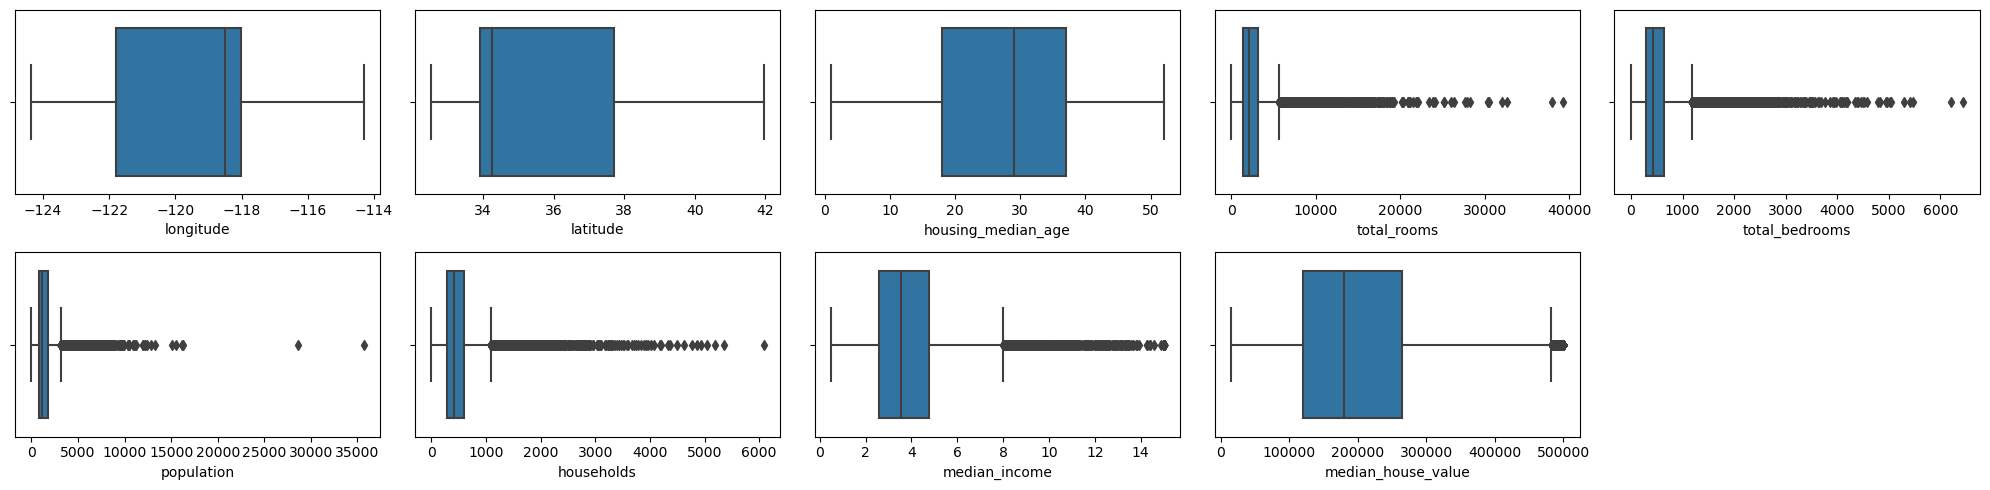

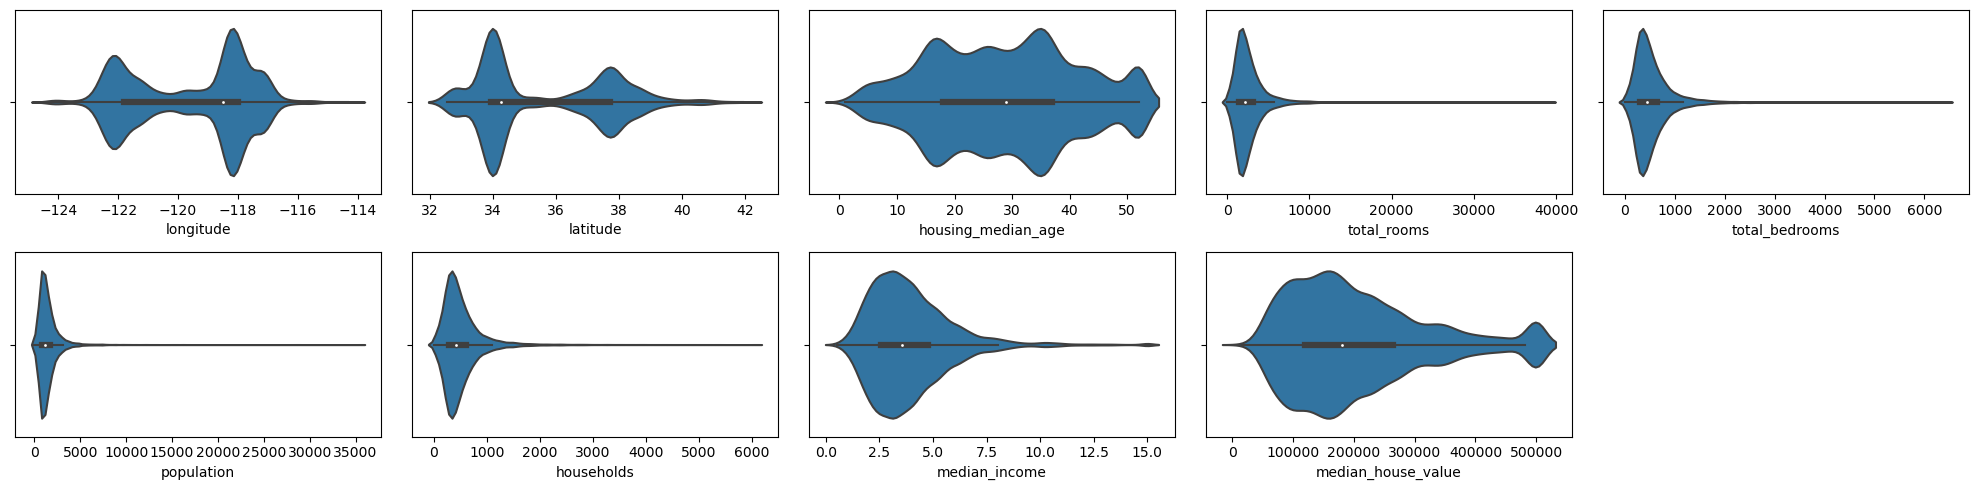

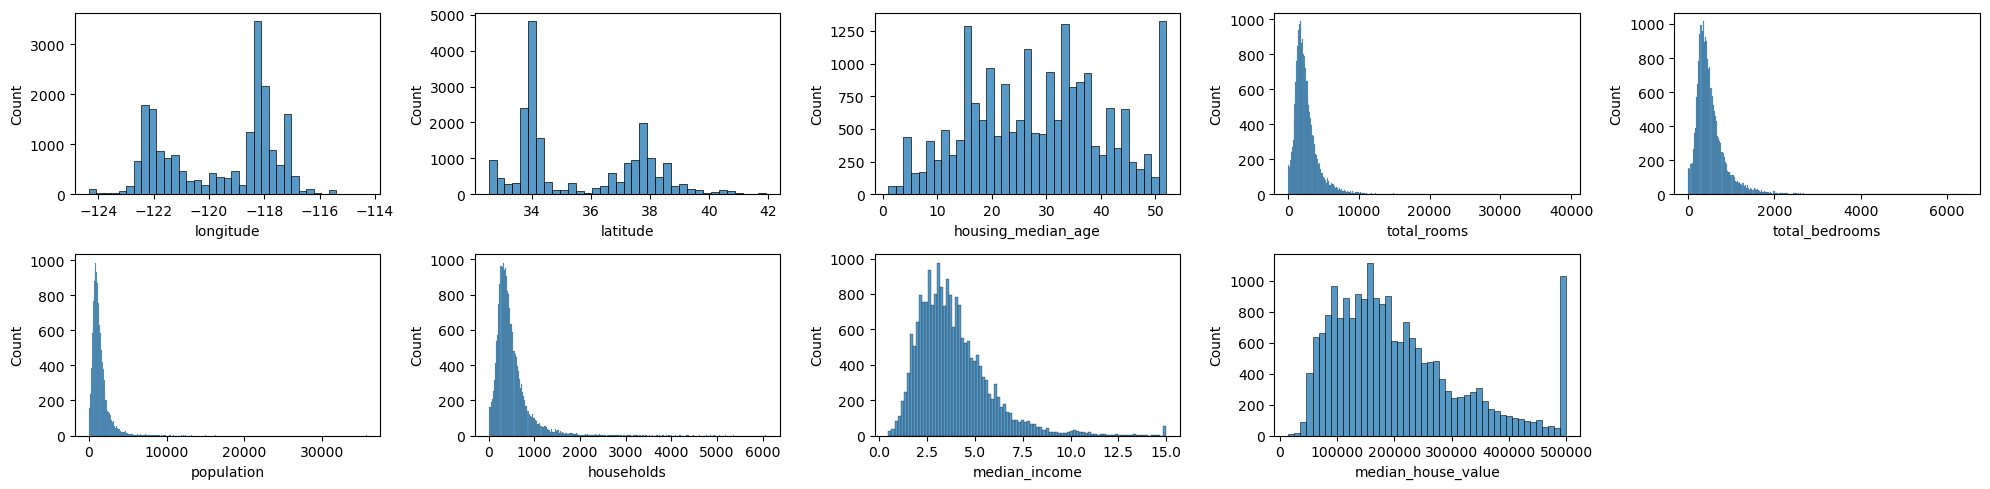

In [7]:
cols=df.columns
cols=cols.drop("ocean_proximity")#Bỏ cột dạng category
n_rows=2
n_cols=5
#1.box plot
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(n_rows,n_cols,i+1)
    sns.boxplot(x=df[column])
plt.tight_layout()
#2.violin plot
plt.figure(figsize=(20,5))
for i ,column in enumerate(cols):
    plt.subplot(n_rows,n_cols,i+1)
    sns.violinplot(x=df[column])
plt.tight_layout()
#3.histogram 
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(n_rows,n_cols,i+1)
    sns.histplot(df[column])
plt.tight_layout()

Pandas hỗ trợ trực quan hóa dữ liệu.Tương tự như seaborn,Pandas dựa trên nền tảng matplotlib

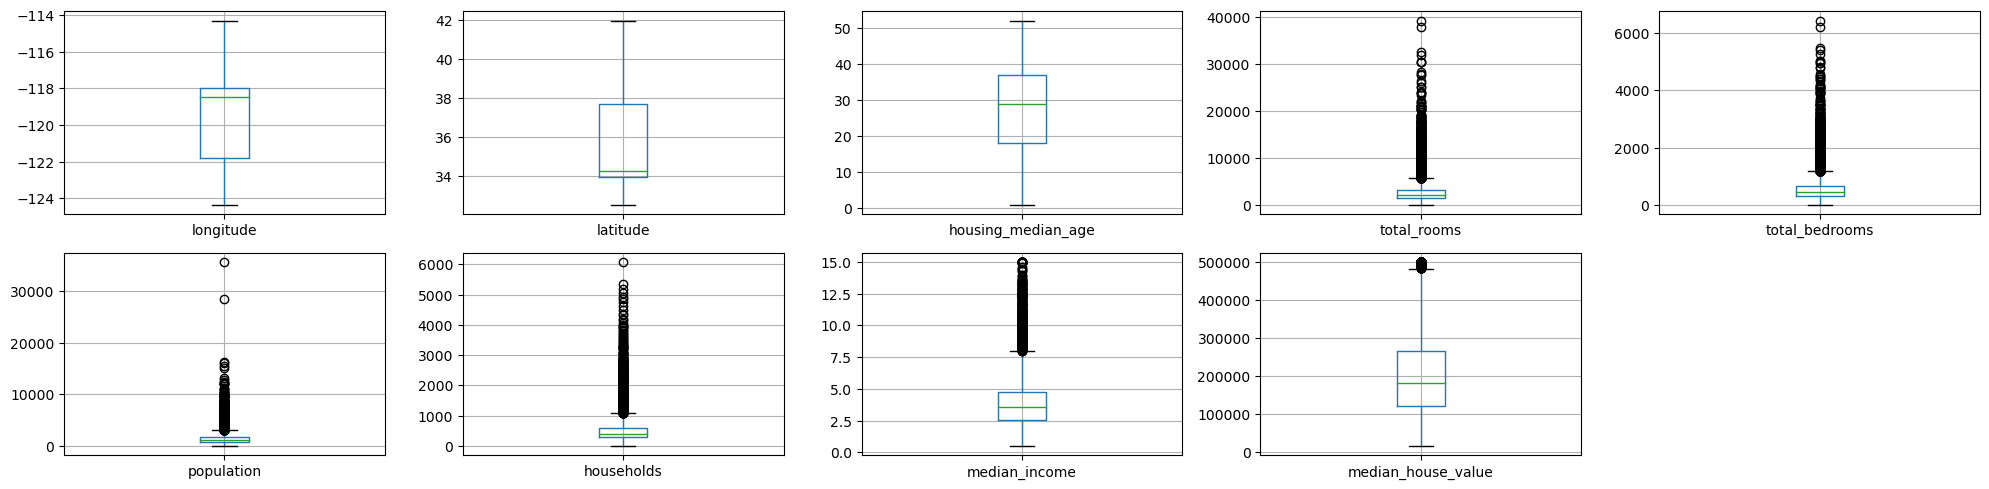

In [8]:
plt.figure(figsize=(20,5))
cols = df.columns
cols = cols.drop('ocean_proximity')

for i, column in enumerate(cols):
    plt.subplot(2, 5, i+1) # 2 hàng, 5 cột
    df.boxplot(column)
plt.tight_layout()

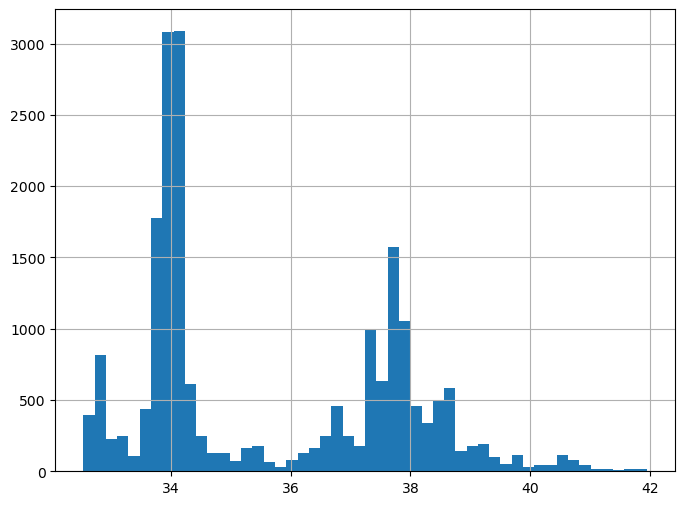

In [9]:
df["latitude"].hist(bins=50,figsize=(8,6));

Pandas hỗ trợ nhiều biểu đồ histogram trong 1 hình rất tốt.Chỉ cần 1 câu lệnh

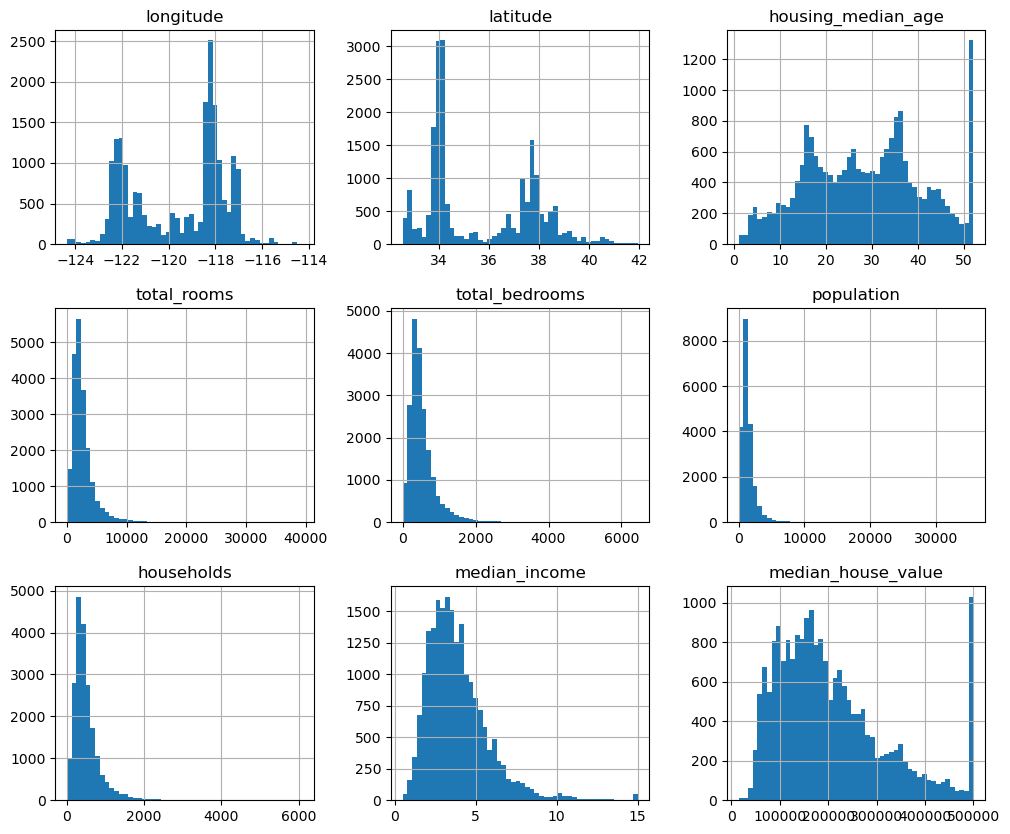

In [10]:
df.hist(bins=50,figsize=(12,10));

**Nhận xét** :
* Dựa vào đồ thị của longtitude(kinh độ) và latitude(vĩ độ),ta thấy có hau khu vực điak lý tập trung nhiều điểm dữ liệu.Khả năng đây là hai khu thành phố lớn với nhiều đồ thị vệ tinh.Với hiểu biết về California,ta có thể dự đoan đây là Sanfrancisco và Los Angeles.
* Cột housing_median_age và median_house_value có bin cuối cùng(giá trị lớn nhất) cao hơn hẳn các bin gần đó.Chứng tỏ dữ liệu đã được tiền xử lý.Các giá trị quá lớn(ngoại lệ) đã bị cắt gọn .Tức là các giá trị lớn này được chuyển thành giá trị tại điểm bị cắt.
* Các cột Total_rooms,total_berrooms,population,households có hầu hết giá trị tập trung ở các bin đầu tiên,phần các bin sau rất dài nhưng có ít giá trị.Phân phối dữ liệu tập trung về một phía gọi là "đuôi dài" hay lệch.Các phân phối trong trường hợp này đều ở dạng lệch phải .Ở đây lệch phải không phải dữ liệu chủ yếu ở bên ngoài,mà là giá trị trung bình(mean) sẽ nằm ở bên phải so với mode(đỉnh của histogram).Tương tự như lệch trái

# Minh họa độ tương quan

Các histogram trên chỉ cho chúng ta thấy phân phối của từng trường dữ liệu.Một cách hữu ích khác là minh họa độ tương quan giữa các trường dữ liệu để tìm những trường quan tọng có khả năng mạng lại kết quả cao khi xây dựng mô hình.

Minh họa độ tương quan giữa các cột median_income,population,housing_median_age và cột nhãn median_house_value

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

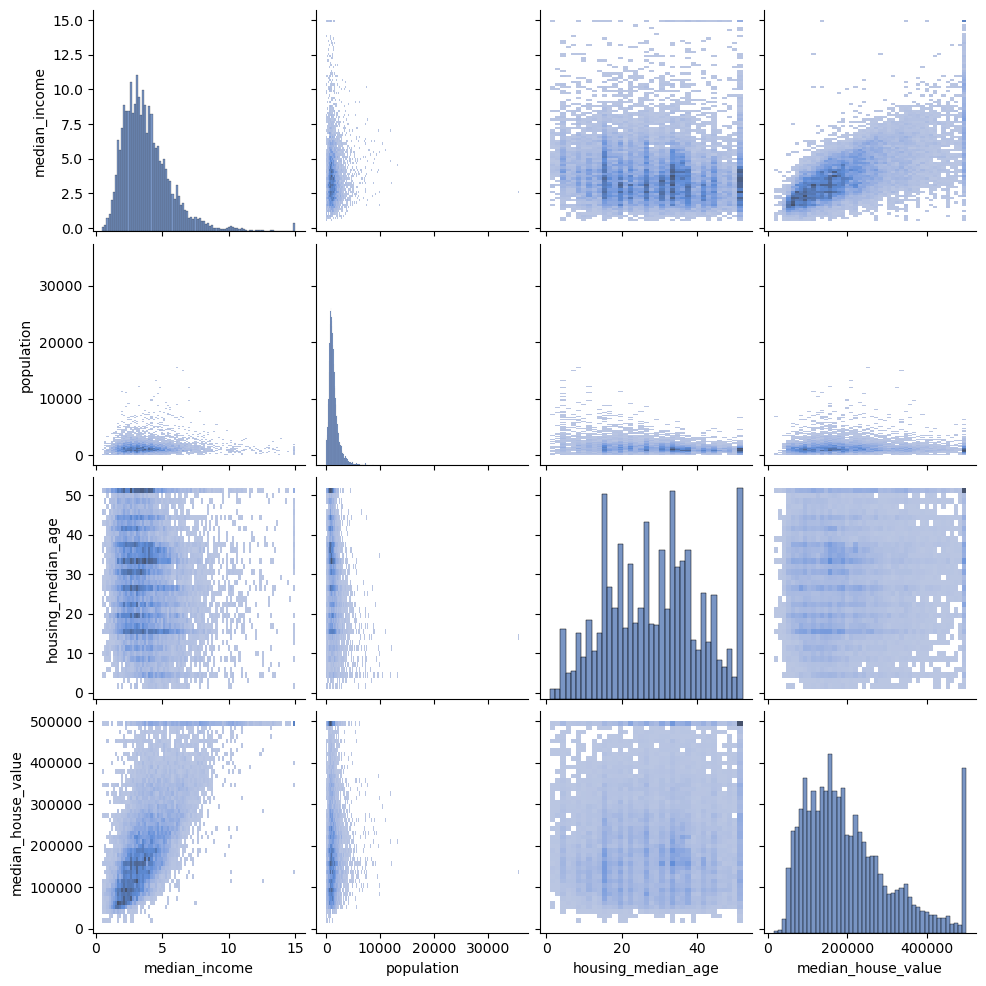

In [11]:
column=["median_income","population","housing_median_age","median_house_value"]
plot_kws={"s":1}
plt.figure(figsize=(8,6))
sns.set_palette("deep")
sns.pairplot(df[column],kind="hist")

C:\Users\Admin\AppData\Local\Temp\ipykernel_17572\966960297.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df,x="median_house_value",y="median_income",cbar=True,palette="deep")


<Axes: xlabel='median_house_value', ylabel='median_income'>

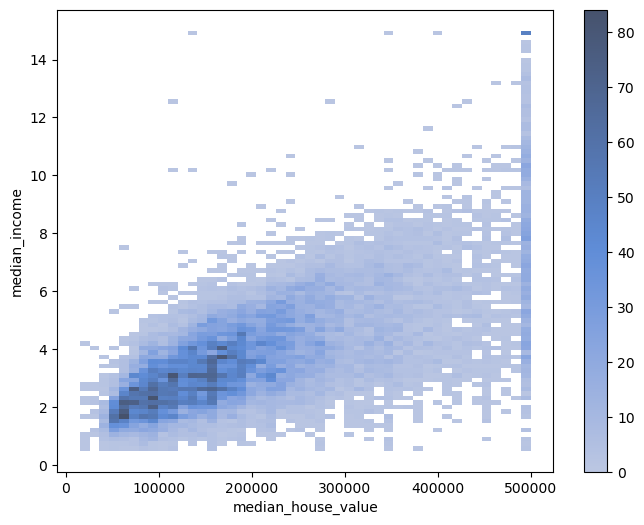

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df,x="median_house_value",y="median_income",cbar=True,palette="deep")

<Axes: xlabel='median_house_value', ylabel='median_income'>

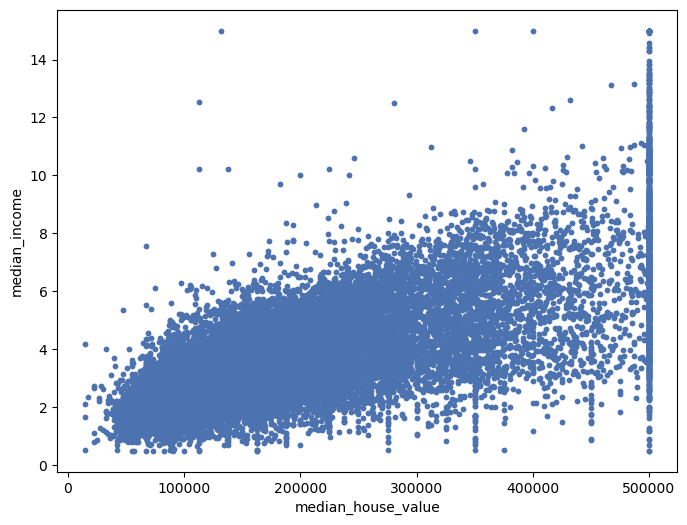

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="median_house_value",y="median_income",marker='.',s=70,linewidth=0)

Ở đây, ta quan sát thấy rằng các khi vực có thu nhập trung vị csao(median_income cao) có xu hướng có giá cao hơn.Sự thật là việc này không hoàn toàn đúng khi ở phần sát biên phải,giá nhà ở mức cao nhất nhưng thu nhập trung vị trải dài từ gần thấp nhất tới gần cao nhất.Tuy nhiên ,phần lớn dữ liệu tuân theo quy luật thu nhập tăng thì giá nhà tăng.Thêm nữa,ta có vài quan sát khác :

1. Các điểm dữ liệu chủ yếu nằm trong phần phía dưới trái,mật độ các điểm ở các ô còn lại khá thưa.
2. Ngoài cột tương ứng với giá nhà cao nhất,có khá nhiều các 'cột' với các căn nhà có giá giống nhau.Nguyên nhân khi bán nhà thường làm tròn.Một số giá nhà phổ biến là 280k,350k,450k và 500k.
3. Khu vực có thu nhập thấp vẫn có nhiều căn nhà đắt tiền(phần dưới bên phải) hơn số lượng căn nhà có giá trị thấp ở khu vực có thu nhập cao ( phần trên bên trái)

[Text(0.5, 1.0, 'most common house prices'),
 Text(0.5, 0, 'population'),
 Text(0, 0.5, 'house price')]

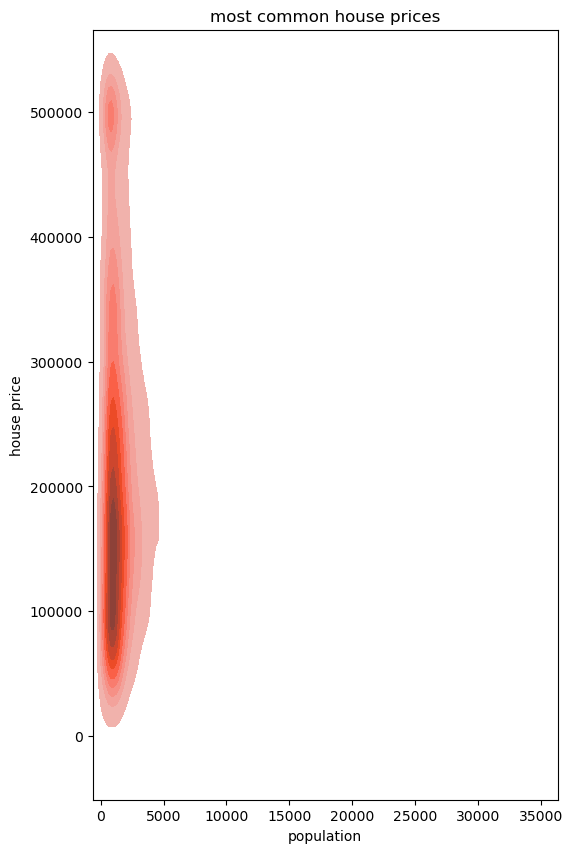

In [15]:
plt.figure(figsize=(6,10))
sns.kdeplot(data=df,x="population",y="median_house_value",fill="True",color="salmon").set(
    title="most common house prices",
    xlabel="population",
    ylabel="house price"
)

Ta có thể thấy giá tập trung ở khoảng từ 50k USD đến 280k USD

 Bạn có thể quan sát thêm các  ô khác và đưa ra nhận xét.Càng quan sát nhiều và hiểu về dữ liệu,chúng ta sẽ có lợi thế trong việc giải thích kết quả của mô hình sau này.

# Minh họa trên bản đồ
Ngoài các minh họa tổng quát nói trên,tùy từng loại dữ liệu mà chúng ta có thêm các minh họa riêng biệt.Trong bài toán này, tọa độ địa lý có thể cho ta thấy những điều đặc biệt hơn là các histogram

<Axes: xlabel='longitude', ylabel='latitude'>

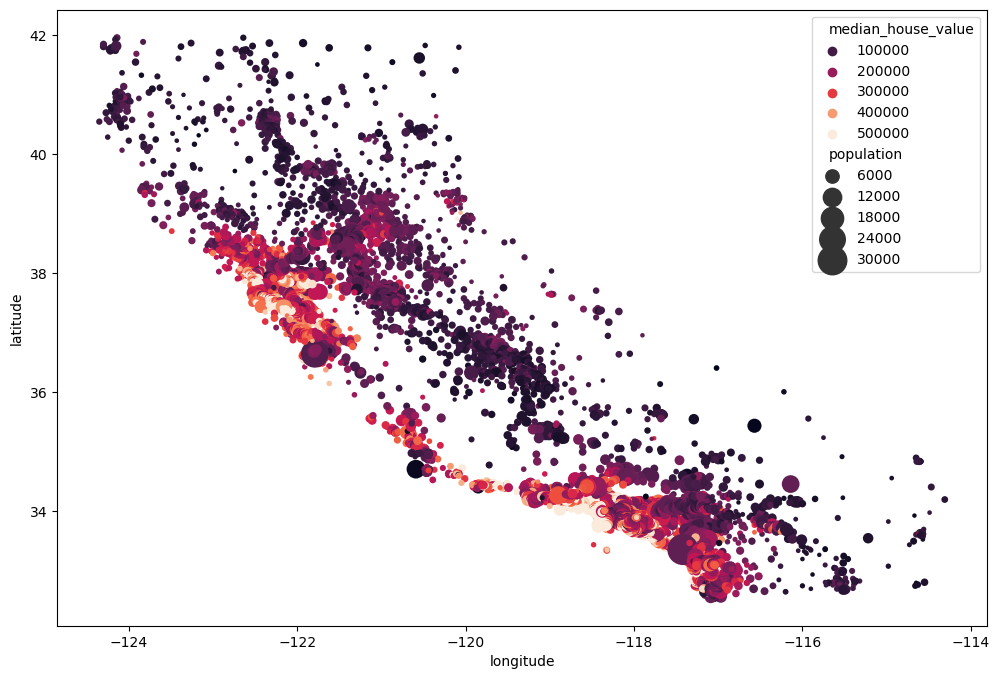

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="longitude",y="latitude",size="population",sizes=(10,500),hue="median_house_value",linewidth=0,palette="rocket")

Có thể tách ra để xem cho rõ

 sắp xếp data theo population để dữ màu quan trọng nổi ở trên

In [18]:
df1=df.sort_values(by="population")
df2=df.sort_values(by="median_house_value")

<Axes: xlabel='longitude', ylabel='latitude'>

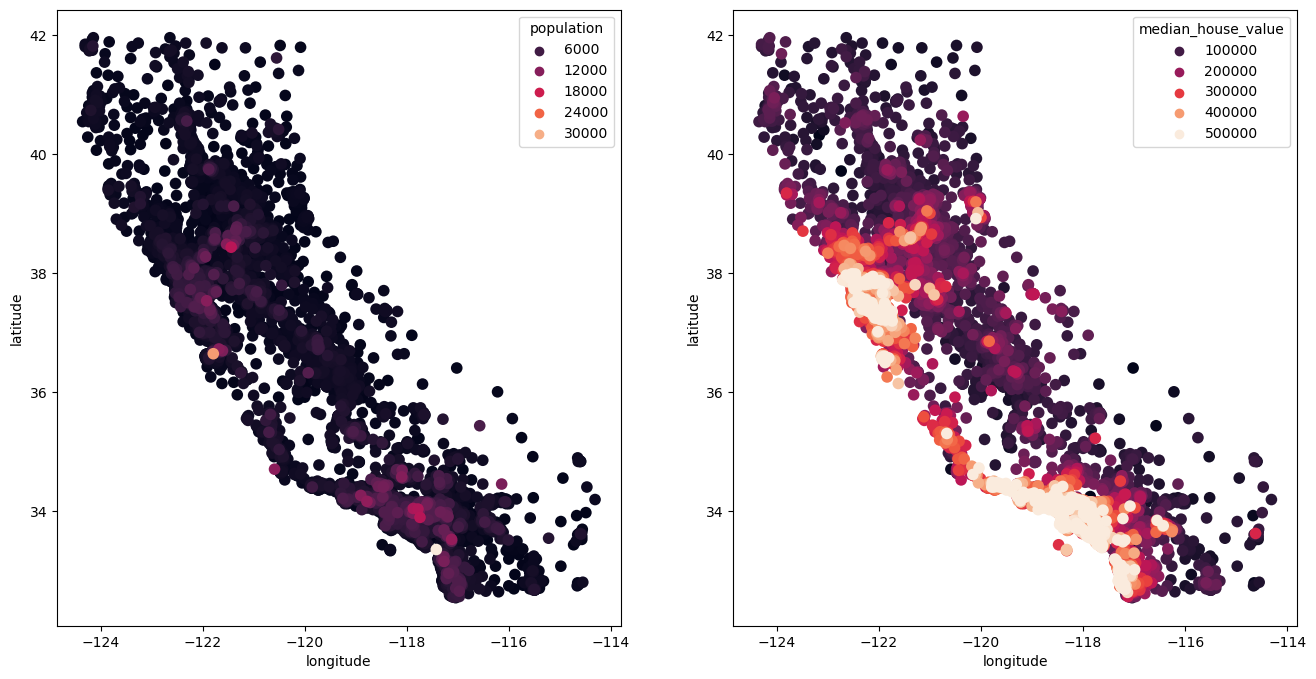

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x="longitude",y="latitude",hue="population",s=70,linewidth=0,palette="rocket")
plt.subplot(1,2,2)
sns.scatterplot(data=df2,x="longitude",y="latitude",hue="median_house_value",s=70,linewidth=0,palette="rocket")

Trong bản đồ trên,mỗi hình tròn tương ứng với một điểm dữ liệu với bán kính thể hiện số dân(cột population) và màu sắc thể hiện giá nhà.Chúng ta thấy rằng có hai cụm dân cư lớn ở ven biển với mức giá rất cao.

 Còn có thể minh họa trực tiếp trên map bằng cách sau:
 Ảnh California được chụp từ tọa độ Google máp trái dưới(32.25,-126.25)-phải trên(42.15,-113.85)

 **Bản đồ mật độ dân số California :**

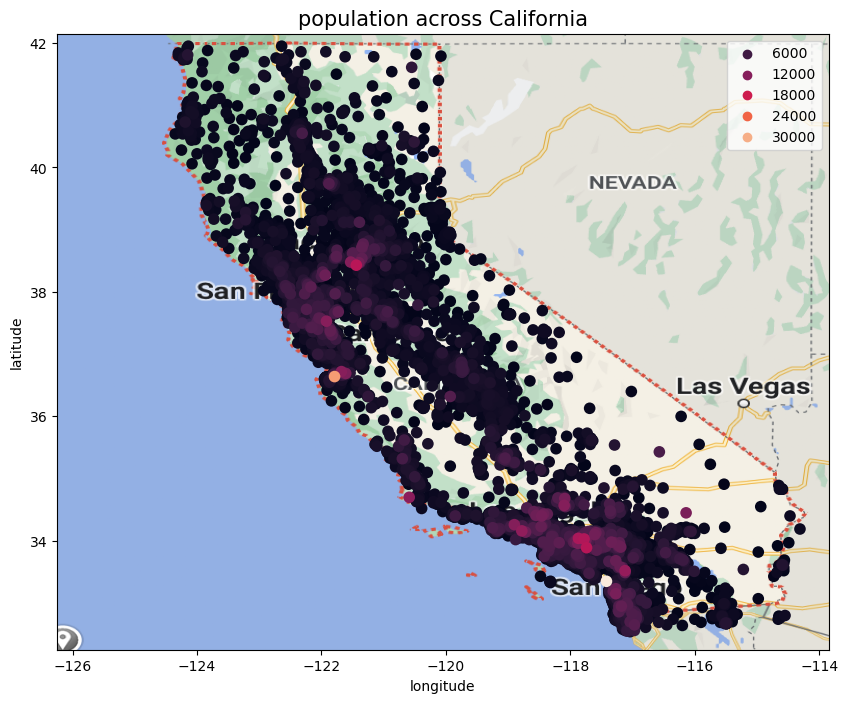

In [24]:
california_img=plt.imread("cali_map.png")
plt.figure(figsize=(12,8))
sns.scatterplot(data=df1,x="longitude",y="latitude",hue="population",s=70,linewidth=0,palette="rocket")

plt.imshow(california_img,extent=[-126.25,-113.85,32.25,42.15],alpha=1)
plt.title("population across California",fontsize=15)
plt.legend()
plt.show()

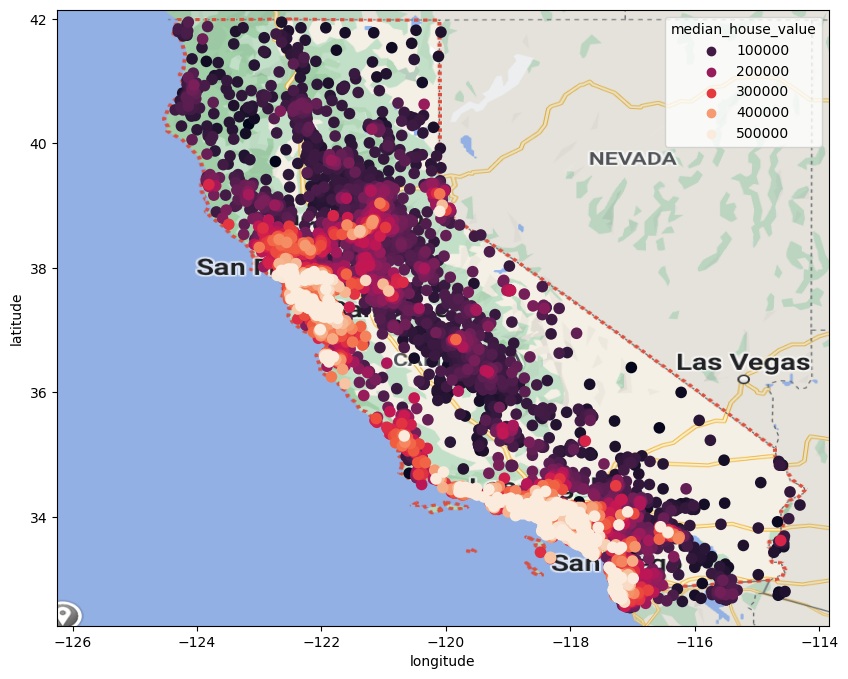

In [25]:
plt.figure(figsize=(12, 8))
plt.imshow(california_img, extent=[-126.25, -113.85, 32.25, 42.15], alpha=1)
sns.scatterplot(data=df2, x="longitude", y="latitude", hue="median_house_value", s=70, linewidth=0, palette="rocket")
plt.show()

Ta thấy rằng kết quả này hoàn toàn hợp lý.Khu vực San Francisco Ở phía bắc và Los Angeles ở phía nam thực sự là các khu dân cư với giá nhà đắt đỏ.Dữ liệu được lấy từ năm 1990 nhưng tới giờ vẫn giữ nguyên tính chất đặc thù.

Minh họa ngoài việc giúp chúng ta hiểu sâu thêm về dữ liệu còn giúp chúng tta kiểm định xem dữ liệu có gì bất thường hơn.